In [1]:
import os
import sys
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_vasp
from statmechlib.preprocessing import Trajectory

In [4]:
target_raw = '../data/target_raw'
target_proc = '../data/target_processed'
working = '../data/working'

datasets = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

datasets_0k = ['bcc_0k',
               'fcc_0k',
               'vac_0k',
               'i110_0k',
               'i111_0k',
               'screw_111_0k']

In [5]:
#with open(os.path.join(target_proc,  "datasets.pickle"), 'wb') as fo:
#    pickle.dump(datasets, fo)
#
#print(datasets)

In [6]:
trajdirs = [target_raw + '/' + dataset for dataset in datasets]
trajdirs_0k = [target_raw + '/' + dataset for dataset in datasets_0k]

In [7]:
trajectories = {}
for name, traj_path in zip(datasets, trajdirs):
    trajectories[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/bcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/fcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OUTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/POSCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/CONTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/XDATCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OSZICAR
Reading ../data/target_raw/vac_npt_l

In [80]:
trajectories_0k = {}
for name, traj_path in zip(datasets_0k, trajdirs_0k):
    trajectories_0k[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_0k/OUTCAR
Reading ../data/target_raw/bcc_0k/POSCAR
Reading ../data/target_raw/bcc_0k/CONTCAR
Reading ../data/target_raw/bcc_0k/XDATCAR
Reading ../data/target_raw/bcc_0k/OSZICAR
Reading ../data/target_raw/bcc_0k/INCAR
Reading ../data/target_raw/fcc_0k/OUTCAR
Reading ../data/target_raw/fcc_0k/POSCAR
Reading ../data/target_raw/fcc_0k/CONTCAR
Reading ../data/target_raw/fcc_0k/OSZICAR
Reading ../data/target_raw/fcc_0k/INCAR
Reading ../data/target_raw/vac_0k/OUTCAR
Reading ../data/target_raw/vac_0k/POSCAR
Reading ../data/target_raw/vac_0k/CONTCAR
Reading ../data/target_raw/vac_0k/XDATCAR
Reading ../data/target_raw/vac_0k/OSZICAR
Reading ../data/target_raw/vac_0k/INCAR
Reading ../data/target_raw/i110_0k/OUTCAR
Reading ../data/target_raw/i110_0k/POSCAR
Reading ../data/target_raw/i110_0k/CONTCAR
Reading ../data/target_raw/i110_0k/XDATCAR
Reading ../data/target_raw/i110_0k/OSZICAR
Reading ../data/target_raw/i110_0k/INCAR
Reading ../data/target_raw/i111_0k/OUTCAR
Re

In [81]:
# Convert MD trajectory dicts to objects
trjs = {}
for k, trj in trajectories.items():
    trjs[k] = Trajectory(trj, inplace=False)

In [82]:
# Convert MD trajectory 0K configs to objects
trjs_0k = {}
for k, trj in trajectories_0k.items():
    trjs_0k[k] = Trajectory(trj, inplace=False)[-1]

In [83]:
# join 0 K configurations into a pseudo-trajectory
traj0k = copy.deepcopy(trjs_0k['bcc_0k'])

for k, trj in trjs_0k.items():
    print(k)
    if 'bcc' not in k:
        traj0k.append(trj)
    print(len(traj0k['box']))

bcc_0k
1
fcc_0k
2
vac_0k
3
i110_0k
4
i111_0k
5
screw_111_0k
6


In [84]:
traj0k['energy']

[-1656.3257, -1343.3027, -1640.2161, -1657.5219, -1657.8717, -1735.6497]

In [85]:
# Create an artificial configuration with large box and 0 energy
traj_inf = copy.deepcopy(trjs_0k['bcc_0k'])

In [86]:
def make_infinite_conf(trj):
    """
    Scales box size by 10 to separate all atoms beyond cutoff, and sets energies and forces to 0.
    
    Parameters
    ----------
    trj: Trajectory object (or dict)
         Trajectory to be rescaled
    
    Returns
    -------
    trj: Trajectory object (or dict)
         Rescaled trajectory
    """
    trj['box'][0] = trj['box'][0]*10
    trj['box0'] = trj['box0']*10
    trj['energy'][0] = 0.0
    trj['free_energy'][0] = 0.0
    trj['total_energy'][0] = 0.0
    trj['forces'][0] = np.zeros_like(trj['forces'][0])
    return trj

In [87]:
traj_inf = make_infinite_conf(traj_inf)

In [88]:
traj_inf['box0']

array([[127.44894465,   0.        ,   0.        ],
       [  0.        , 127.44894465,   0.        ],
       [  0.        ,   0.        , 127.44894465]])

In [89]:
traj0k['temp'] = [300.0 for _ in range(len(traj0k['temp']))]

In [90]:
traj0k.append(traj_inf)

In [91]:
trjs['relax'] = traj0k

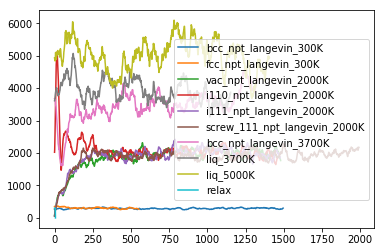

In [92]:
for key, trj in trjs.items():
    #print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=key)

plt.legend()
plt.show()

In [93]:
def get_msd(xyzs):
    """Return mean squared displacement (msd) for a given trajectory (traj)."""
    msd = []
    for rs in xyzs:
        msd.append(np.mean((rs - xyzs[0])**2))
    #msd = [0.0 for _ in range(len(xyzs))]
    return np.array(msd)

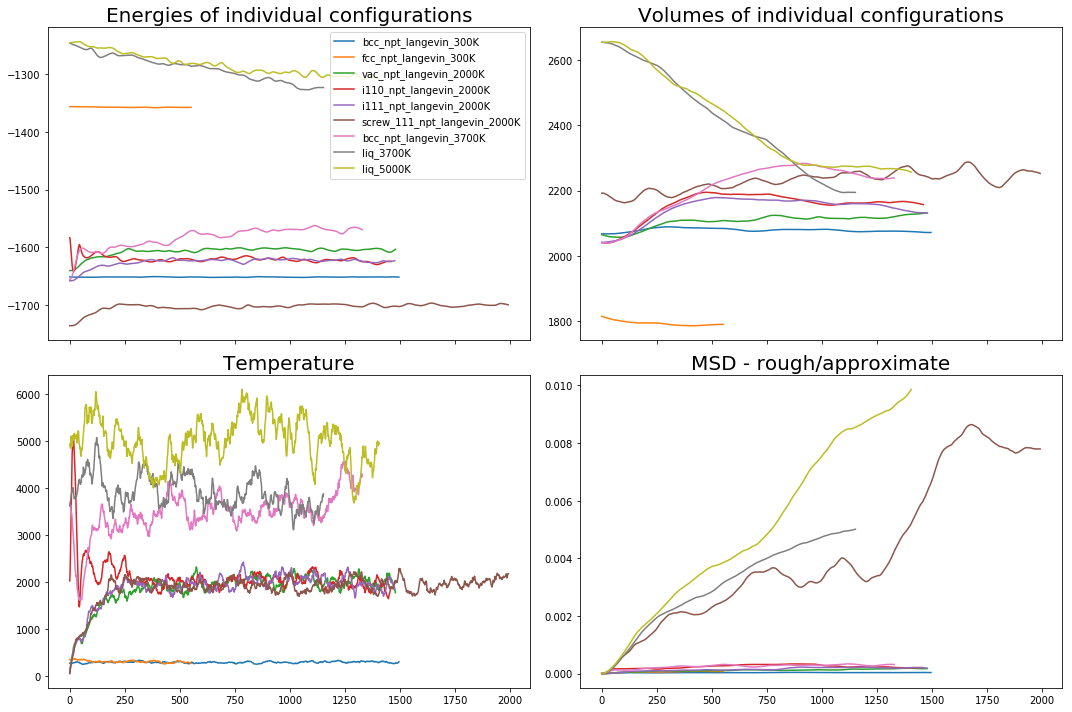

In [94]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trjs.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [95]:
[(k, len(v['energy'])) for k, v in trjs.items()]

[('bcc_npt_langevin_300K', 1496),
 ('fcc_npt_langevin_300K', 552),
 ('vac_npt_langevin_2000K', 1480),
 ('i110_npt_langevin_2000K', 1461),
 ('i111_npt_langevin_2000K', 1477),
 ('screw_111_npt_langevin_2000K', 1992),
 ('bcc_npt_langevin_3700K', 1329),
 ('liq_3700K', 1153),
 ('liq_5000K', 1406),
 ('relax', 7)]

In [97]:
cuts = {'bcc_npt_langevin_300K':450,
        'fcc_npt_langevin_300K':70,
        'vac_npt_langevin_2000K':400,
        'i110_npt_langevin_2000K':700,
        'i111_npt_langevin_2000K':700,
        'screw_111_npt_langevin_2000K':1220,
        'bcc_npt_langevin_3700K':510,
        'liq_3700K':800,
        'liq_5000K':900,
        'relax':0}

In [98]:
trj_samples = {}
for key, traj in trjs.items():
    if 'relax' not in key:
        trj_samples[key] = traj[cuts[key]::5]
    else:
        trj_samples[key] = traj[cuts[key]:]

In [99]:
[(k, len(v['energy'])) for k, v in trj_samples.items()]

[('bcc_npt_langevin_300K', 210),
 ('fcc_npt_langevin_300K', 97),
 ('vac_npt_langevin_2000K', 216),
 ('i110_npt_langevin_2000K', 153),
 ('i111_npt_langevin_2000K', 156),
 ('screw_111_npt_langevin_2000K', 155),
 ('bcc_npt_langevin_3700K', 164),
 ('liq_3700K', 71),
 ('liq_5000K', 102),
 ('relax', 7)]

In [100]:
weights = {k:1.0 for k in trj_samples}
weights['relax'] = 10.0

target_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # target data
    target_dict = {'type':'trajectory', 'weight':weights[key]}
    target_dict['box'] = trj['box']
    target_dict['xyz'] = trj['xyz']
    target_dict['energy'] = trj['energy']
    target_dict['temp'] = trj['temp']

    # save inverse temperature data (if T=0, set beta=1/300)
    target_dict['beta'] = np.empty_like(target_dict['temp'])
    for i, temp in enumerate(target_dict['temp']):
        if temp == 0.0:
            target_dict['beta'][i] = 1.0/300.0
        else:
            target_dict['beta'][i] = 1.0/temp
            
    target_data[key] = target_dict

dataset # bcc_npt_langevin_300K
dataset # fcc_npt_langevin_300K
dataset # vac_npt_langevin_2000K
dataset # i110_npt_langevin_2000K
dataset # i111_npt_langevin_2000K
dataset # screw_111_npt_langevin_2000K
dataset # bcc_npt_langevin_3700K
dataset # liq_3700K
dataset # liq_5000K
dataset # relax


In [101]:
from statmechlib.preprocessing import pair_dist, get_stats_EAM, get_stats_EAM_pairdist

In [299]:
%%writefile -a ../../statmechlib/statmechlib/preprocessing/stats.py

def get_stats(stats_func, trj_samples, params):
    """
    Calculates statisitics for a given trajectory and hyperparameters.
    
    Parameters
    ----------
    stats_func: function
                calculates statistics for a single configuration
    trj_samples: dict
                set of trajectories (list of box parameters and particle configurations)
    params: list of floats
            hyperparameters (e.g., functional form of the potential)
            
    Returns
    -------
    stats_data: dict
            relevant trajectory statistics and the corresponding hyperparamters
    """

    stats_data = {}

    for key, trj in trj_samples.items():
    
        stats_dict = {'energy':[]}
        
        for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        
            a1, ar, a2, f1, fr, f2 = stats_func(xyz, box, params)

            stats_dict['energy'].append(np.array([ar, a2, a1]))

        stats_data[key] = stats_dict
    
    stats_data['hyperparams'] = sc
    
    return stats_data

Appending to ../../statmechlib/statmechlib/preprocessing/stats.py


In [102]:
#sc = [2.74, 3.252, 3.804, 4.356, 4.908, 5.46]
sc = [2.74, 3.25, 3.75, 4.5, 5.48]
#sc = [2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0, 5.5, 5.75]
#index = [0, 1, 3, 5, 8, 10]

stats_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # statistics data
    stats_dict = {'energy':[]}
    for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        print('conf', ii)
        
        a1, ar, a2, f1, fr, f2 = get_stats_EAM_pairdist(xyz, box, sc=sc)

        #print(xyz.shape, box)
        #print('x', a1.shape, rr.shape, np.sum(np.abs(a1)))
        #print('x', a1.shape, ar, a1, a2)
        
        stats_dict['energy'].append(np.array([ar, a2, a1]))
        #stats_dict['forces'].append(np.array([fr, f2, f1]))
               # add dataset
            
        #print('conf:', len(traj['xyz']), box.max())
        # plot pair distances - 
        #if ii == 10:
        #    plt.hist(rr.flatten(),100, alpha=1.0,label=key, histtype='step')
        #    plt.xlim(2,6)
        #    plt.ylim(0,1500)
            
    #plt.legend()
    stats_data[key] = stats_dict

dataset # bcc_npt_langevin_300K
conf 0
conf 1
conf 2
conf 3
conf 4
conf 5
conf 6
conf 7
conf 8
conf 9
conf 10
conf 11
conf 12
conf 13
conf 14
conf 15
conf 16
conf 17
conf 18
conf 19
conf 20
conf 21
conf 22
conf 23
conf 24
conf 25
conf 26
conf 27
conf 28
conf 29
conf 30
conf 31
conf 32
conf 33
conf 34
conf 35
conf 36
conf 37
conf 38
conf 39
conf 40
conf 41
conf 42
conf 43
conf 44
conf 45
conf 46
conf 47
conf 48
conf 49
conf 50
conf 51
conf 52
conf 53
conf 54
conf 55
conf 56
conf 57
conf 58
conf 59
conf 60
conf 61
conf 62
conf 63
conf 64
conf 65
conf 66
conf 67
conf 68
conf 69
conf 70
conf 71
conf 72
conf 73
conf 74
conf 75
conf 76
conf 77
conf 78
conf 79
conf 80
conf 81
conf 82
conf 83
conf 84
conf 85
conf 86
conf 87
conf 88
conf 89
conf 90
conf 91
conf 92
conf 93
conf 94
conf 95
conf 96
conf 97
conf 98
conf 99
conf 100
conf 101
conf 102
conf 103
conf 104
conf 105
conf 106
conf 107
conf 108
conf 109
conf 110
conf 111
conf 112
conf 113
conf 114
conf 115
conf 116
conf 117
conf 118
conf 11

conf 40
Replicating: 1 5 1
conf 41
Replicating: 1 5 1
conf 42
Replicating: 1 5 1
conf 43
Replicating: 1 5 1
conf 44
Replicating: 1 5 1
conf 45
Replicating: 1 5 1
conf 46
Replicating: 1 5 1
conf 47
Replicating: 1 5 1
conf 48
Replicating: 1 5 1
conf 49
Replicating: 1 5 1
conf 50
Replicating: 1 5 1
conf 51
Replicating: 1 5 1
conf 52
Replicating: 1 5 1
conf 53
Replicating: 1 5 1
conf 54
Replicating: 1 5 1
conf 55
Replicating: 1 5 1
conf 56
Replicating: 1 5 1
conf 57
Replicating: 1 5 1
conf 58
Replicating: 1 5 1
conf 59
Replicating: 1 5 1
conf 60
Replicating: 1 5 1
conf 61
Replicating: 1 5 1
conf 62
Replicating: 1 5 1
conf 63
Replicating: 1 5 1
conf 64
Replicating: 1 5 1
conf 65
Replicating: 1 5 1
conf 66
Replicating: 1 5 1
conf 67
Replicating: 1 5 1
conf 68
Replicating: 1 5 1
conf 69
Replicating: 1 5 1
conf 70
Replicating: 1 5 1
conf 71
Replicating: 1 5 1
conf 72
Replicating: 1 5 1
conf 73
Replicating: 1 5 1
conf 74
Replicating: 1 5 1
conf 75
Replicating: 1 5 1
conf 76
Replicating: 1 5 1
c

In [103]:
stats_data['function'] = 'EAM-cubic-spline'
stats_data['hyperparams'] = sc

In [104]:
with open(os.path.join(working, "target_5only.pickle"), 'wb') as fo:
    pickle.dump(target_data, fo)
    
with open(os.path.join(working, "stats_5only.pickle"), 'wb') as fo:
    pickle.dump(stats_data, fo)

In [105]:
#%%writefile -a ../src/optimize/optscript.py

from statmechlib.forcefields import sd2_loss, utot_EAM, udif_print
from scipy.optimize import fmin

In [106]:
#%%writefile -a ../src/optimize/optscript.py

# load target data
with open(os.path.join(working, 'target_5only'+'.pickle'), 'rb') as fi:
    targ_dict = pickle.load(fi)

# load stats data
with open(os.path.join(working, 'stats_5only'+'.pickle'), 'rb') as fi:
    stats_dict = pickle.load(fi)

In [107]:
#%%writefile -a ../src/optimize/optscript.py

# load stats data
with open(os.path.join(working, 'pars_in'+'.pickle'), 'rb') as fi:
    pars_dict = pickle.load(fi)

In [108]:
stats_dict.keys()

dict_keys(['bcc_npt_langevin_300K', 'fcc_npt_langevin_300K', 'vac_npt_langevin_2000K', 'i110_npt_langevin_2000K', 'i111_npt_langevin_2000K', 'screw_111_npt_langevin_2000K', 'bcc_npt_langevin_3700K', 'liq_3700K', 'liq_5000K', 'relax', 'function', 'hyperparams'])

In [109]:
#%%writefile -a ../src/optimize/optscript.py
pars_in = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
print(pars_in)

[-0.4093427610992626, 0.0, 0.8307314918975489, 6.306463298847209, 2.569446338927059, -0.21327208205268988, -0.22254590199235236, 0.02984117320348275]


In [110]:
targ_dict['relax']['energy']

[-1656.3257, -1343.3027, -1640.2161, -1657.5219, -1657.8717, -1735.6497, 0.0]

In [111]:
# eliminate fcc and screw dislocation from the 'relax' datasets

#stats_dict['relax']['energy'] = [ x for i, x in enumerate(stats_dict['relax']['energy']) if i in [0, 1, 2, 3, 4, 6] ]

#for key in targ_dict['relax']:
#    if 'type' not in key and 'weight' not in key:
#        print(key, len(targ_dict['relax'][key]))
#        targ_dict['relax'][key] = [ x for i, x in enumerate(targ_dict['relax'][key]) if i in [0, 1, 2, 3, 4, 6] ]
#        print(len(targ_dict['relax'][key]))

In [112]:
# Final scaling and normalization of data
# %load ../src/optimize/optscript.py

# scale energies (subtract energy of an isolated atom)
# determine interaction energy
print(targ_dict['relax']['energy'][0], len(targ_dict['relax']['xyz'][0]))
u_t = targ_dict['relax']['energy'][0]/len(targ_dict['relax']['xyz'][0])
u_e = -8.9 # external energy from atom (experimental)
u_i = u_t - u_e # internal energy per atom (to be subtracted from all atoms)
print(u_t, u_e, u_i)

emin = 0.0
esum = 0.0
isum = 0.0
lemin = 0.0
lesum = 0.0
lisum = 0.0
for key, trj in targ_dict.items():
    for i in range(len(targ_dict[key]['energy'])):
        targ_dict[key]['energy'][i] -= u_i*targ_dict[key]['xyz'][i].shape[0]
        enex = targ_dict[key]['energy'][i]/targ_dict[key]['xyz'][i].shape[0]

        if 'fcc' in key:
            esum += enex
            isum += 1.0
            if enex < emin:
                imin = i
                #print(enex)
                emin = enex
                xmin = targ_dict[key]['xyz'][i]
                bmin = targ_dict[key]['box'][i]
                smin = stats_dict[key]['energy'][i]

        if 'liq_5000K' in key:
            lesum += enex
            lisum += 1.0
            if enex < lemin:
                limin = i
                #print(enex)
                lemin = enex
                lxmin = targ_dict[key]['xyz'][i]
                lbmin = targ_dict[key]['box'][i]
                lsmin = stats_dict[key]['energy'][i]
                lnat = targ_dict[key]['xyz'][i].shape[0]

print('Emin', emin, esum/isum)

# temporary fix - set fcc energy at 0K to minimum energy of 300K trajectory
#targ_dict['relax']['energy'][1] = emin*targ_dict['relax']['xyz'][1].shape[0]
#targ_dict['relax']['xyz'][1] = xmin
#targ_dict['relax']['box'][1] = bmin
#stats_dict['relax']['energy'][1] = smin

#targ_dict['relax']['energy'][5] = lemin*lnat
#targ_dict['relax']['xyz'][5] = lxmin
#targ_dict['relax']['box'][5] = lbmin
#stats_dict['relax']['energy'][5] = lsmin

targ_dict['relax']['energy'][-1] = 0.0

targ_dict['relax']['energy'][5] = targ_dict['relax']['energy'][6]
targ_dict['relax']['xyz'][5] = targ_dict['relax']['xyz'][6]
targ_dict['relax']['box'][5] = targ_dict['relax']['box'][6]
stats_dict['relax']['energy'][5] = stats_dict['relax']['energy'][6]

print('OK energies:', targ_dict['relax']['energy'])

-1656.3257 128
-12.94004453125 -8.9 -4.04004453125
Emin -8.537148987268518 -8.53025689104859
OK energies: [-1139.2, -906.9778906249999, -1127.13044453125, -1136.3561554687499, -1136.7059554687498, 0.0, 0.0]


In [113]:
targ_dict['relax']['weight'] = 30.0
print([targ_dict[k]['weight'] for k in targ_dict])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 30.0]


In [113]:
#index = [0, 1, 3, 5, 8, 10]
#index = np.array([True if i in index else False for i in range(len(stats_dict['hyperparams']))])

In [114]:
def select_nodes(stats_input, index):
    """
    Select only configuration statistics from stats (spline nodes) that are given in index.
    """
    
    stats_select = copy.deepcopy(stats_input)
    
    for key, stats in stats_select.items():
        if type(stats) == dict and 'energy' in stats.keys():
            for i, conf in enumerate(stats['energy']):
                new_conf = np.empty((3, sum(index)), dtype=float)
                new_conf[0] = conf[0][index]
                new_conf[1] = conf[1][index]
                new_conf[2] = conf[2][index]
                stats['energy'][i] = new_conf
                
    stats_select['hyperparams'] = list(np.array(stats_select['hyperparams'])[index])

    return stats_select

In [114]:
#stats_opt = select_nodes(stats_dict, index)
stats_opt = copy.deepcopy(stats_dict)

In [115]:
stats_opt['relax']['energy']

[array([[0.00000000e+00, 1.24528681e+02, 3.80847597e+02, 9.56126091e+02,
         2.00263778e+03],
        [0.00000000e+00, 1.14669429e+02, 1.00317100e+04, 3.98502243e+05,
         7.66972351e+06],
        [0.00000000e+00, 1.21151504e+02, 1.13316322e+03, 7.14200861e+03,
         3.13324849e+04]]),
 array([[0.00000000e+00, 9.34706347e+01, 3.17666019e+02, 7.94980203e+02,
         1.67069614e+03],
        [0.00000000e+00, 6.05939829e+01, 8.08372958e+03, 3.17069151e+05,
         6.18469963e+06],
        [0.00000000e+00, 8.08959217e+01, 9.34367591e+02, 5.85179189e+03,
         2.58446815e+04]]),
 array([[2.76324659e-02, 1.24222929e+02, 3.78275399e+02, 9.47574219e+02,
         1.98328472e+03],
        [2.19136734e-10, 1.16314355e+02, 1.00012025e+04, 3.93815332e+05,
         7.55722027e+06],
        [5.48206511e-05, 1.21517704e+02, 1.12681295e+03, 7.07074891e+03,
         3.09746164e+04]]),
 array([[3.41458902e+00, 1.35989475e+02, 3.98695592e+02, 9.82947579e+02,
         2.04849721e+03],
    

In [116]:
stats_opt['hyperparams']

[2.74, 3.25, 3.75, 4.5, 5.48]

In [117]:
# prepare data for fitting
stats = []
target = []
for key in list(targ_dict.keys()):
    stats.append(stats_opt[key])
    target.append(targ_dict[key])

In [121]:
pars_dict['pair']

[0.8307314918975489,
 6.306463298847209,
 2.569446338927059,
 -0.21327208205268988,
 -0.22254590199235236]

In [131]:
pars_in1 = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
multi_pars = [pars_in1]

In [132]:
multi_pars

[[-0.4093427610992626,
  0.0,
  0.8307314918975489,
  6.306463298847209,
  2.569446338927059,
  -0.21327208205268988,
  -0.22254590199235236]]

In [133]:
pars = multi_pars[0]
print(pars)
sd_ini = sd2_loss(list(pars), stats, target, utot_EAM)
print('Initial sd2:', sd_ini)
output = fmin(sd2_loss, pars, args=(stats, target, utot_EAM), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
params_uopt = output[0]
print('Opt #', 0, output[1:])
print("Optimized parameters:")
print(*params_uopt)

[-0.4093427610992626, 0.0, 0.8307314918975489, 6.306463298847209, 2.569446338927059, -0.21327208205268988, -0.22254590199235236]
Initial sd2: 9.430972569254015
Opt # 0 (1.890866864756042e-05, 485, 783, 0)
Optimized parameters:
-0.9687368094984576 -1.7519462551100218e-06 0.4521274608136319 -4.553211013907685 2.6132268157516023 -0.39546952445290057 0.06521322304021893


In [125]:
optimal_parameters = []
optimal_parameters.append(tuple([output[1:], params_uopt]))

In [136]:
# Formatting for optimization


# prepare parameters for fitting
multi_pars = []
multi_pars = [pars_in1]

#pars_in1 = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
#multi_pars = [np.array(pars_in)]
pars_in2 = [-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952]
#multi_pars.append(np.array(pars_in))
#pars_in1 = [-0.6169796280549427, 0.00010563526234385224, 0.3044078692520532, 6.65890926803851, -1.1489327923874284, 2.2081284218733765, -1.5236567484357728, 0.21922639345669304]
pars_in2 = [-1.4592640134931716, -3.0515321379039898e-05, -0.06397036119840327, 12.43462333841233, -1.4039556209239763, 2.277361245273334, -1.3383612333938921, 0.35119549556765894]

#pars_in1 = [-3.2512467172281996, -0.0003202150380230016, 0.15269806859034524, 11.969935407675626, -0.6164601815938373, 2.2310427435982905, -0.9802667652058299, 0.6418078671434688]
pars_in2 = [-2.445149490918154, -0.00020801983958736083, -0.2640494502785708, 0.204150653694475, -0.8354501676207835, 2.5231913314784125, -1.1085851952767731, 0.5027740347187062,]
pars_in3 = [-0.7440002542627315, 1.3187608684512786e-05, -131.04373074002945, 30.6115049563255, -7.626040158485056, 4.444445847922796, -1.2013317345405128, 0.15543885566625482]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

#pars_in1 = [-2.9376727625275185, -0.00028022535517750524, -0.06998899879559964, 8.988902981345005, -1.133979308034288, 2.484611922799483, -1.0173639391284288, 0.5833969384340463]
pars_in2 = [-2.3436680210936442, -0.0002067565260307982, -134.89037863511976, 27.962504525433765, -4.032672086835333, 3.247698323035168, -0.9987257996581616, 0.4513984121355687]
pars_in3 = [-0.8995317581781127, -1.2233561504472977e-05, -150.5525413026948, 40.17212749365491, -8.477591070776592, 4.582710884516496, -1.1420118895802114, 0.172979770984942]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

#pars_in1 = [-3.004270792293166, -0.000292843788870708, -49.140610378337, 19.78377322180363, -2.1254890071331394, 2.677100169824965, -0.9715996036930384, 0.5849112609684701]

pars_in2 = [-0.9687368094984576, -1.7519462551100218e-06, 0.4521274608136319, -4.553211013907685, 2.6132268157516023, -0.39546952445290057, 0.06521322304021893]
pars_in3 = [-0.7247413076966889, 4.007429607649578e-05, 0.4917078330692323, -5.517586548053023, 2.3138228175871545, 0.00564134532755059, -0.06332824395119344]
pars_in4 = [-0.8081353893202243, 7.99816821702985e-06, 1.2508886148678564, -3.3412835190411796, 2.956903283301183, -0.9010477743862613, 0.13803918191350828]
#multi_pars.append(np.array(pars_in1))
multi_pars.append(np.array(pars_in2))
multi_pars.append(np.array(pars_in3))
multi_pars.append(np.array(pars_in4))

for _ in range(5):
    pars = np.array(pars_in1)
    pars += np.random.standard_normal(pars.shape)*0.1
    print(pars)
    multi_pars.append(pars)

for _ in range(5):
    pars = np.array(pars_in2)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(5):
    pars = np.array(pars_in3)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(5):
    pars = np.array(pars_in4)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)
    
#for _ in range(5):
#    pars = 0.5*(np.array(pars_in1) + np.array(pars_in2))
#    pars += np.random.standard_normal(pars.shape)*0.01
#    multi_pars.append(pars)

[-0.44158869  0.10219194  0.78984773  6.09875068  2.59374859 -0.05335933
 -0.15314149]
[-0.32872484 -0.14647316  0.76891324  6.29852973  2.60703543 -0.25870307
 -0.24461027]
[-0.53166676  0.06061101  0.78354355  6.28779898  2.55967227 -0.3556392
 -0.06403391]
[-0.43607363 -0.12135548  0.77299832  6.27776832  2.50863764 -0.02935342
 -0.2893421 ]
[-0.2993362   0.04854619  0.81968554  6.23228296  2.68349769 -0.46297604
 -0.37925961]


In [137]:
optimal_parameters = []
for i, pars in enumerate(multi_pars):
    sd_ini = sd2_loss(list(pars), stats, target, utot_EAM)
    print('Initial sd2:', sd_ini)
    output = fmin(sd2_loss, list(pars), args=(stats, target, utot_EAM), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
    params_uopt = output[0]
    print('Opt #', i, output[1:])
    print("Optimized parameters:")
    print(*params_uopt)
    optimal_parameters.append(tuple([output[1:], params_uopt]))

Initial sd2: 9.430972569254015
Opt # 0 (1.890866864756042e-05, 485, 783, 0)
Optimized parameters:
-0.9687368094984576 -1.7519462551100218e-06 0.4521274608136319 -4.553211013907685 2.6132268157516023 -0.39546952445290057 0.06521322304021893
Initial sd2: 1.890866864756042e-05
Opt # 1 (3.022661344063711e-06, 474, 777, 0)
Optimized parameters:
-0.8352645046649594 -6.780762845216598e-06 30.19128592301058 -4.227076940661586 2.2852150784932457 -0.38580456271799013 0.05901498578026729
Initial sd2: 2.9081588397587267e-05
Opt # 2 (2.1385087376247234e-06, 886, 1363, 0)
Optimized parameters:
-1.2928865156423024 -7.266752884134902e-05 24.02843420031509 -3.3186160912707887 2.663860745410256 -0.7917953638959749 0.2251059100446858
Initial sd2: 9.981139493819698e-06
Opt # 3 (2.3795034514579735e-06, 924, 1433, 0)
Optimized parameters:
-0.6742894940465569 1.168936079282653e-05 24.29132717651207 -3.4792082111423057 2.5848974622081604 -0.7293198718173441 0.09396705368945522
Initial sd2: 85.01125012298948


../../statmechlib/statmechlib/forcefields/eam.py:219: RuntimeWarning: overflow encountered in exp
  eee = np.exp(-uuu)


Opt # 4 (1.7682478222747072e-05, 905, 1433, 0)
Optimized parameters:
1.3426708264169278 0.0003102973919209642 5.7819220923305235 -5.133595946469514 2.2630368617610346 -0.14846253221499522 -0.42442148534254187
Initial sd2: 85.11083467855677
Opt # 5 (0.06553654397303202, 351, 608, 0)
Optimized parameters:
-0.6452234019107417 -0.0006198810408673302 3.5106719127631933 12.755740964503055 1.592874119595367 -0.5211918426303332 0.32609715736334577
Initial sd2: 82.69403460305107
Opt # 6 (5.559369020138784e-05, 959, 1513, 0)
Optimized parameters:
2.565605378881594 0.0004205422841024495 6.655711487868125 0.8541698404232638 3.986896070502662 -2.6821433175289378 -0.142676232092425
Initial sd2: 84.36050995931139
Opt # 7 (0.00017651861577024073, 616, 1016, 0)
Optimized parameters:
-0.8738853699611242 0.00010643725406707887 -3.090109431823741 -6.163708071402789 1.9547678838223526 -0.1498405267286364 -0.025653694281548872
Initial sd2: 81.51688272158393
Opt # 8 (1.2377443702281344e-05, 857, 1369, 0)
Opt

In [138]:
with open(os.path.join(working, 'output_many.pickle'), 'rb') as fi:
    optimal_list = pickle.load(fi)

if type(optimal_list) != list:
    optimal_list = [optimal_list]

optimal_list.append(optimal_parameters)

with open(os.path.join(working, 'output_many.pickle'), 'wb') as fo:
    pickle.dump(optimal_list, fo)

In [139]:
optimal_parameters[0][1]

array([-9.68736809e-01, -1.75194626e-06,  4.52127461e-01, -4.55321101e+00,
        2.61322682e+00, -3.95469524e-01,  6.52132230e-02])

6
0 1.890866864756042e-05
Targ: [-1139.2, -906.9778906249999, -1127.13044453125, -1136.3561554687499, -1136.7059554687498, 0.0]
[0.046875   0.05555556 0.04724409 0.04651163 0.04651163 0.046875  ]
1 3.022661344063711e-06
2 2.1385087376247234e-06
3 2.3795034514579735e-06
4 1.7682478222747072e-05
5 0.06553654397303202
6 5.559369020138784e-05
7 0.00017651861577024073
8 1.2377443702281344e-05
9 2.4793177601585353e-05
10 8.07316368722087e-05
11 6.694727972455462e-05
12 1.206926576601133e-05
13 0.01344288169557418
14 0.0011764960896671378
15 0.00010062090438916384
16 3.1956721136198117e-05
17 0.00010426323633900043
18 3.834768858578926e-05
19 2.064725154504599e-05
20 3.8037857406225515e-05
21 8.914317261405237e-06
22 5.856445504707701e-05
23 8.420244431727069e-06


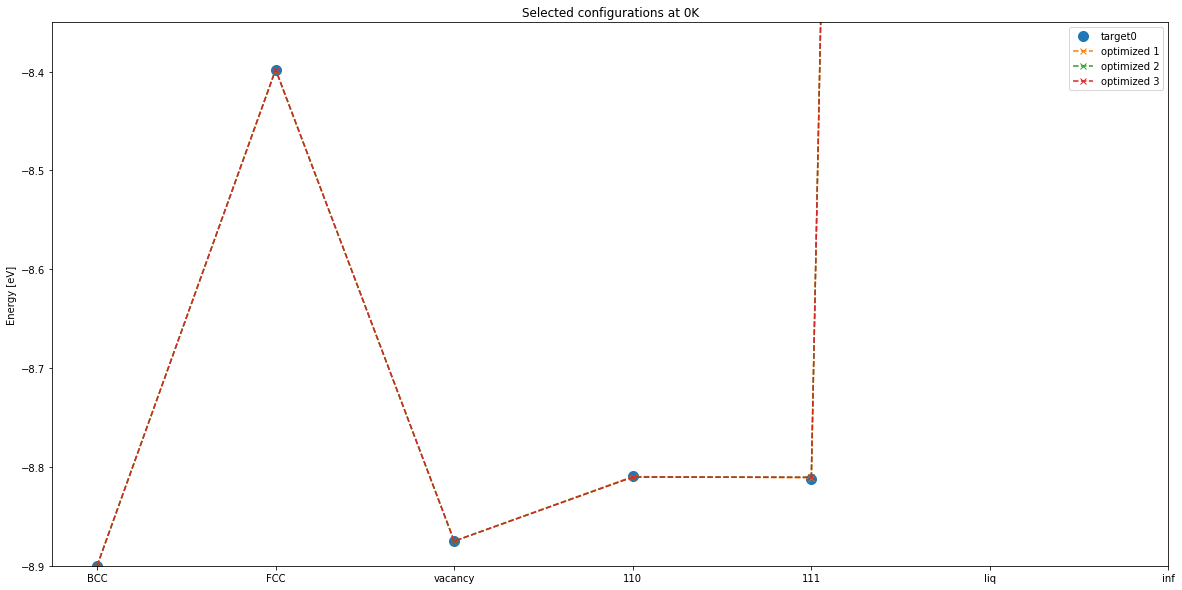

In [153]:
plt.figure(figsize=(20,10))

nat = np.array([len(x) for x in targ_dict['relax']['xyz']])[:-1]
print(len(nat))

for i, params_uopt in enumerate(optimal_parameters):

    print(i, params_uopt[0][0])
    #print(params_uopt[1])

    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)
    plt.title('Selected configurations at 0K')
    if i == 0:
        print('Targ:', targ_out[-1][:-1])
        #nat = np.array([len(x) for x in targ_dict['relax']['xyz']])
        print(len(np.array(targ_out[-1][:-1]))/nat)
        plt.plot(np.array(targ_out[-1][:-1])/nat, 'o', label='target'+str(i), markersize=10)
        
    if params_uopt[0][0] > 5e-6:
        continue
    #if i != 0 and i != 27:
    #    continue
        
    #print('Opti:', [o for o in opti_out[-1][:-1]])
    plt.plot(np.array([o for o in opti_out[-1][:-1]])/nat, 'x--', label='optimized '+str(i))
#    else:
#        plt.plot([o for o in opti_out[-1][:-1]], 'x--', label='optimized '+str(i))
#        plt.plot(targ_out[-1][:-1], 'o', markersize=10)

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['BCC','FCC', 'vacancy','110','111','liq','inf'])
plt.ylabel('Energy [eV]')
#plt.ylim(-1145, -1136)
plt.ylim(-8.905, -8.533)
plt.ylim(-8.9, -8.35)

plt.legend()

0 1.890866864756042e-05
1 3.022661344063711e-06
2 2.1385087376247234e-06
3 2.3795034514579735e-06
4 1.7682478222747072e-05
5 0.06553654397303202
6 5.559369020138784e-05
7 0.00017651861577024073
8 1.2377443702281344e-05
9 2.4793177601585353e-05
10 8.07316368722087e-05
11 6.694727972455462e-05
12 1.206926576601133e-05
13 0.01344288169557418
14 0.0011764960896671378
15 0.00010062090438916384
16 3.1956721136198117e-05
17 0.00010426323633900043
18 3.834768858578926e-05
19 2.064725154504599e-05
20 3.8037857406225515e-05
21 8.914317261405237e-06
22 5.856445504707701e-05
23 8.420244431727069e-06


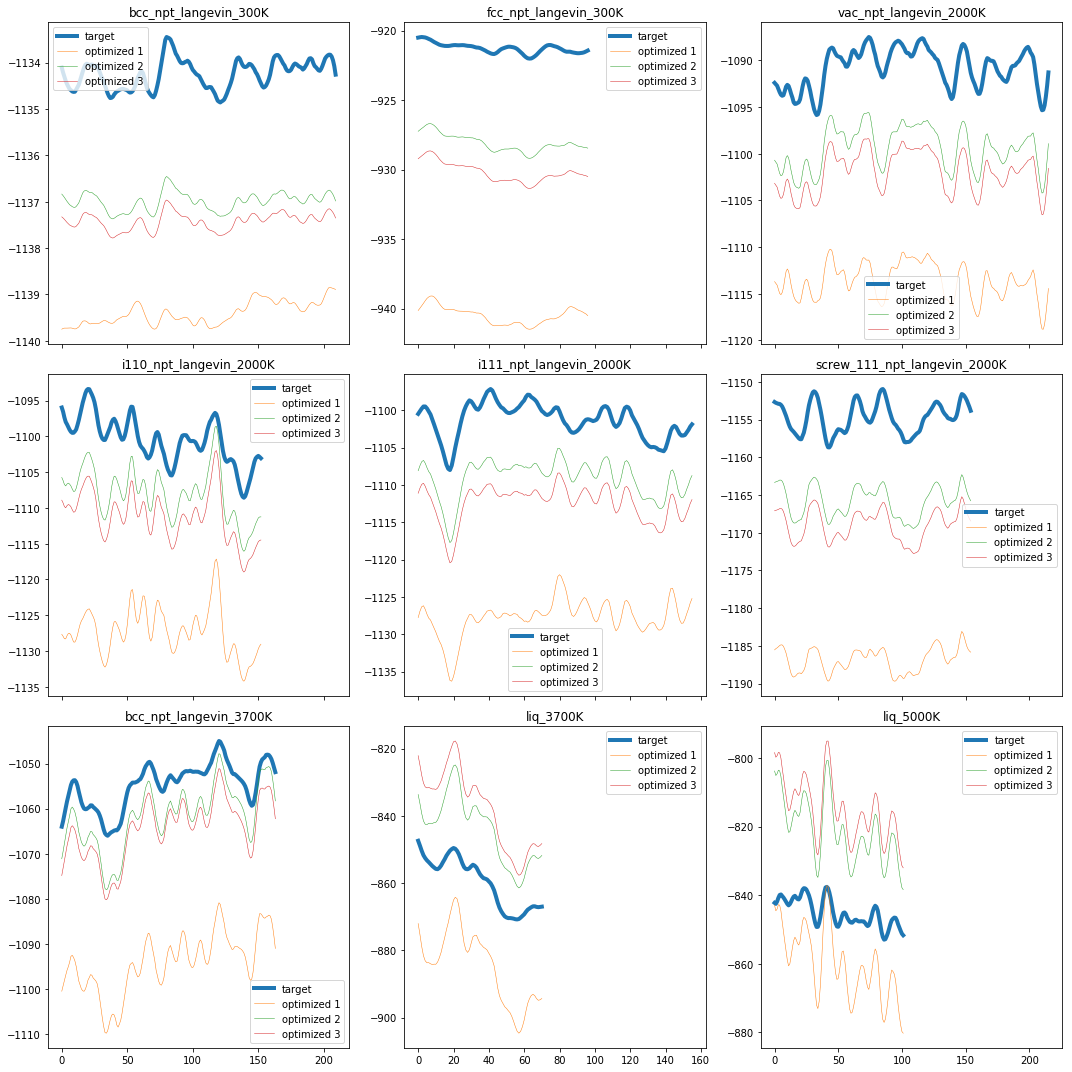

In [146]:
names = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

#x = np.array([-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952])
#optimal_parameters.append(tuple([[3.2627338939720861e-06, 0.0], x]))

fig, axes = plt.subplots(3, 3, sharex='col', figsize=(15,15))

for ip, params_uopt in enumerate(optimal_parameters):

    print(ip, params_uopt[0][0])
    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)

    for i, (tar, opt) in enumerate(zip(targ_out[:-1], opti_out[:-1])):
        x, y = divmod(i, 3)
        tar = np.array(tar)
        opt = np.array(opt)
        #print(names[i], (tar.mean() - opt.mean())/target[i]['xyz'][0].shape[0])
        
        #opt += tar.mean() - opt.mean()
        #print(ip)
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(tar, '-', label='target', linewidth=4)

        if params_uopt[0][0] > 5e-6:
            continue
        #if ip != 0 and ip != 27:
        #    continue
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(opt, '-', label='optimized '+str(ip), linewidth=0.5)
        
            if y == 0:
                axes[x,y].set_ylabel('Energy (eV)')
            else:
                axes[x,y].set_ylabel('')

            if x == 2:
                axes[x,y].set_xlabel('configuration #')
            else:
                axes[x,y].set_xlabel('')

            axes[x,y].set_title(names[i])
        else:
            if ip == 0:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=3)
            else:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=0.5)
            axes[x,y].set_title(names[i])

        
        axes[x,y].legend()

        
fig.tight_layout()

In [157]:
# W parameters
l = 0.274
r_wse = 3.168
r_wse = 1.584
eta = 5.69
dE = 8.9

# equation of state. x is lattice expansion/compression parameter
def eos(x):
    a = (x - 1.0)*r_wse/l
    ene = np.exp(-a)
    ene *= -1.0 - a - 0.05*a**3
    return dE*ene

In [158]:
f_spline = lambda r, aa, kk: sum([a*(rk - r)**3 for a, rk in zip(aa, kk) if r < rk and r > 0.01])

# electronic density function (cubic splines)
#rho = lambda r, a, k: sum([c*(p - r)**3 for c, p in zip(a, k) if r < p])

rho = f_spline

# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# pair potential function (same spline form as electronic density)
V = rho

V = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

# Embedding function. Parameters: electronic density (d), coefficients for 1/2, 1, and 2 powers of density
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# Cohesive potential (cubic splines - same form as V)
phi = V

In [159]:
optimal_parameters[2][1]

array([-1.29288652e+00, -7.26675288e-05,  2.40284342e+01, -3.31861609e+00,
        2.66386075e+00, -7.91795364e-01,  2.25105910e-01])

In [160]:
from statmechlib.preprocessing import pair_dist_cutoff

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         0.,  6.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0., 24.,  0.,  8.,
         0.,  0.,  3.,  0.,  0., 24., 12.,  0.,  0., 12.,  0.,  8.,  0.,
         0.,  3.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.        ,  0.22074804,  0.44149608,  0.66224412,  0.88299216,
         1.1037402 ,  1.32448824,  1.54523628,  1.76598432,  1.98673236,
         2.20748039,  2.42822843,  2.64897647,  2.86972451,  3.09047255,
         3.31122059,  3.53196863,  3.75271667,  3.97346471,  4.19421275,
         4.41496079,  4.63570883,  4.85645687,  5.07720491,  5.29795295,
         5.51870099,  5.73944903,  5.96019707,  6.1809451 ,  6.40169314,
         6.62244118,  6.84318922,  7.06393726,  7.2846853 ,  7.50543334,
         7.72618138,  7.94692942,  8.16767746,  8.3884255 ,  8.60917354,
         8.82992158,  9.05066962,  9.27141766,  9.4921657 ,  9.71291374,
         9.93366178, 10.15440981, 10.37515785, 10.59590589,

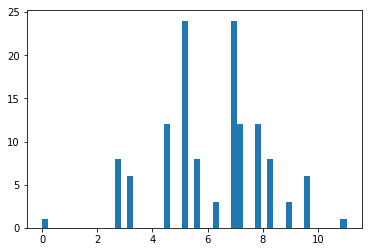

In [161]:
# Total pair potential
pos = targ_dict['relax']['xyz'][0]
bx = targ_dict['relax']['box'][0]
rr, rx = pair_dist_cutoff(pos, bx, 5.5)

plt.hist(rr[0], 50)
#r = np.linspace(0., rcut, 201)

In [162]:
# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

V = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

# Cohesive potential (cubic splines - same form as V)
phi = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

In [163]:
optimal_parameters.append(tuple([output[1:], params_uopt]))
pair_y = optimal_parameters[7][1][2:]
par = optimal_parameters[7][1][:2]
many_y = [par[0], 0.0, par[1]]

In [164]:
#V_x_r = [2.5, 2.75, 3.25, 3.75, 4.5, 5.5]
V_x_r = stats_opt['hyperparams']
rho_x_r = stats_opt['hyperparams'][-1:]
rho_x_a = [1.0]

In [166]:
stats_opt['hyperparams']

[2.74, 3.25, 3.75, 4.5, 5.48]

In [167]:
ene = []
for a in np.linspace(0.5, 2.0, 101):
    z = a*rr
    u_pair = 0.5*np.sum([V(x, pair_y, V_x_r) for x in z.flatten() if x > 0.1])

    u_many = 0.0
    for i in range(z.shape[0]):
        #print(z[i])
        d = np.sum([phi(x, rho_x_a, rho_x_r) for x in z[i] if x > 0.1])
        #print('d',a, d)
        u_many += F(d, many_y)

    ene.append([a, u_pair, u_many, u_pair+u_many])
    #print(a, u_pair, u_many, u_pair + u_many)

#print(ene)
ene = np.array(ene)
#ene2 = np.array(ene2)
#ene

Text(0,0.5,'U')

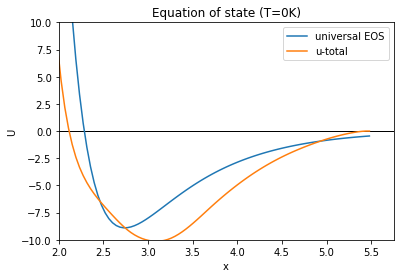

In [168]:
#plt.plot(ene[:,0], ene[:,1]/54, label='pair')
#plt.plot(ene[:,0], ene[:,2]/54, label='manybody')
plt.title('Equation of state (T=0K)')
plt.plot(ene[:,0]*2.74, [eos(x) for x in ene[:,0]], label='universal EOS')
plt.plot(ene[:,0]*2.74, ene[:,3]/128, label='u-total')
#plt.plot(ene2[:,0], ene2[:,3]/54, label='f-total')
plt.hlines(0.0,0.5,6.0,lw=1)
plt.legend()
plt.xlim(2.0, 5.75)
plt.ylim(-10,10)
plt.xlabel('x')
plt.ylabel(r'U')

In [39]:
rho_a = [1.0]
rho_r = [stats_opt['hyperparams'][-1]]

pair_a = pars_in1[2:]
pair_r = stats_opt['hyperparams']

many_a = [pars_in[0], 0.0, pars_in[1]]

In [40]:
# Ranges of densities and separations

nr = 5000
rcut = stats_opt['hyperparams'][-1]
dr = rcut/nr

rhomax = 12.0*phi(1.5, rho_a, rho_r)
print('rhomax:', rhomax)
#rhomax = 1000.0
nrho = 5000
drho = rhomax/nrho

ri = 1.0
ro = 2.0

# W properties
na = 74
ma = 183.84
lc = 3.1653
alat = 'bcc'

# System composition
n_el = 1
el_name = ['W']

rhomax: 768.0


In [41]:
def u_trans(r, unucl, ueq, ri=1.0, ro=2.0):
    """Transition between the core and equillibrium potentials"""
    if r < ri:
        return unucl
    elif r < ro:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        return ueq + eta*(unucl - ueq)
    else:
        return ueq

In [42]:
from statmechlib.forcefields import u_core

# prepare lists of values
dens = np.linspace(0., rhomax-drho, nrho, endpoint=True)
r = np.linspace(0., rcut-dr, nr, endpoint=True)
r2 = np.linspace(0., rcut, 201)

fembd = [F(d, many_a) for d in dens] # W
edens = np.array([phi(x, rho_a, rho_r) for x in r])

# 1. Cubic spline for r > r_o
f_outer = [V(x, pair_a, pair_r) for i, x in enumerate(r)]
# 2. Repulsive core for r < r_i (precalculate up to r_o)
f_inner = [0.0] + [u_core(x) for x in r[1:]]
# 3. Transition region for r_i < r < r_o
fpair = [x*u_trans(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]
#fpair = f_outer

In [708]:
# LAMMPS format
pot_path = '../sim/potentials'

with open(os.path.join(pot_path, 'W_lvnew.eam.fs'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    fo.write(f"{n_el:5d} ")
    for i in range(n_el):
        fo.write(f"{el_name[i]:2}")
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    
    # atomic number, mass, lattice size, lattice type
    fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))